In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import newton



(np.float64(-125.999979600101),       converged: True
           flag: converged
 function_calls: 61
     iterations: 30
           root: -125.999979600101
         method: newton)
Convergencia alcanzada después de 27 iteraciones.


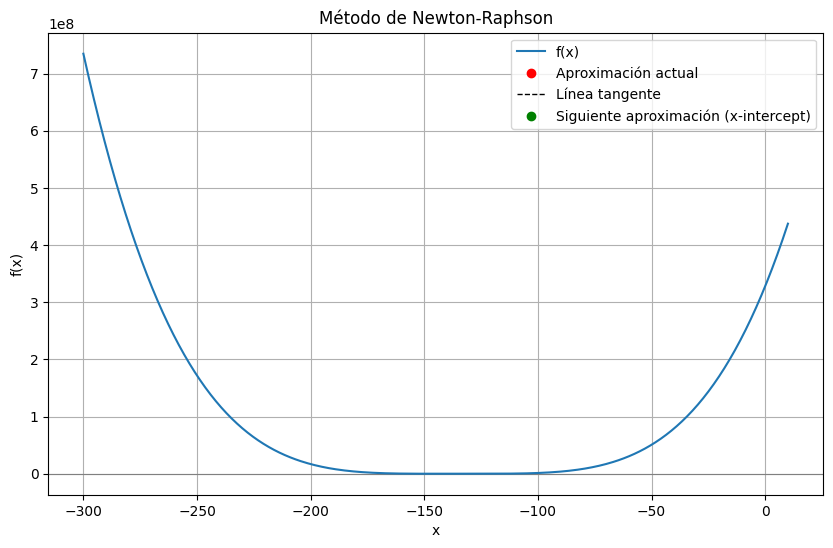

In [2]:
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def f_prime(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

print(newton(f, x0 = 0.75 , fprime = f_prime, full_output = True))

def newton_raphson_steps(f, f_prime, x0, tol=1e-6, max_iter=100):

    steps = [x0]
    x = x0
    for i in range(max_iter):
        f_x = f(x)
        f_prime_x = f_prime(x)

        if abs(f_x) < tol:
            print(f"Convergencia alcanzada después de {i+1} iteraciones.")
            break

        if f_prime_x == 0:
            print("La derivada es cero en este punto. No se puede continuar.")
            break

        x = x - f_x / f_prime_x
        steps.append(x)

    if len(steps) > max_iter:
        print(f"El método no convergió después de {max_iter} iteraciones.")

    return steps

# --- Configuración de la animación ---

# Aproximación inicial
x0 = 0.75

# Obtener los pasos del método de Newton-Raphson
x_steps = newton_raphson_steps(f, f_prime, x0)

# Rango para graficar la función
# Basado en el análisis previo, la función tiene un mínimo negativo alrededor de x=-150
# y dos raíces reales. El punto inicial 0.75 converge a la raíz menos negativa.
# Graficaremos un rango que incluya el punto inicial y la posible zona de la raíz.
# Ajusta este rango si es necesario para visualizar mejor.
x_plot = np.linspace(-300, 10, 400)
y_plot = f(x_plot)

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Método de Newton-Raphson")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.axhline(0, color='grey', lw=0.8) # Eje x

# Graficar la función
line_func, = ax.plot(x_plot, y_plot, label="f(x)")

# Inicializar elementos para la animación
point, = ax.plot([], [], 'ro', label="Aproximación actual") # Punto (x_k, f(x_k))
tangent_line, = ax.plot([], [], 'k--', lw=1, label="Línea tangente") # Línea tangente
next_x_intercept, = ax.plot([], [], 'go', label="Siguiente aproximación (x-intercept)") # Punto (x_{k+1}, 0)

ax.legend()

def init():
    point.set_data([], [])
    tangent_line.set_data([], [])
    next_x_intercept.set_data([], [])
    return point, tangent_line, next_x_intercept

# Función de actualización para cada frame de la animación
def update(frame):
    x_k = x_steps[frame]
    y_k = f(x_k)
    f_prime_k = f_prime(x_k)

    # Actualizar el punto actual
    point.set_data([x_k], [y_k])

    # Calcular y actualizar la línea tangente
    # La línea tangente pasa por (x_k, y_k) con pendiente f_prime_k
    # Su ecuación es y - y_k = f_prime_k * (x - x_k)
    # Para dibujarla, usamos dos puntos: (x_k, y_k) y el siguiente punto (x_{k+1}, 0)
    if frame + 1 < len(x_steps):
        x_k_plus_1 = x_steps[frame + 1]
        tangent_x = [x_k, x_k_plus_1]
        tangent_y = [y_k, 0] # El siguiente punto está en el eje x
        next_x_intercept.set_data([x_k_plus_1], [0])
    else:
        # Para el último paso, dibujamos la tangente usando un pequeño rango alrededor de x_k
        tangent_x = np.linspace(x_k - 10, x_k + 10, 2) # Ajusta el rango si es necesario
        tangent_y = y_k + f_prime_k * (tangent_x - x_k)
        next_x_intercept.set_data([], []) # No hay siguiente punto

    tangent_line.set_data(tangent_x, tangent_y)

    # Actualizar el título
    ax.set_title(f"Iteración {frame}: $x_{frame}$ = {x_k:.6f}")

    # Ajustar los límites del eje x para seguir la animación si es necesario
    # ax.set_xlim(min(x_steps) - 10, max(x_steps) + 10) # Esto puede hacer que la gráfica se mueva mucho

    return point, tangent_line, next_x_intercept

# Crear la animación
# interval: Retraso entre frames en ms
# repeat: Si la animación debe repetirse
ani = animation.FuncAnimation(fig, update, frames=len(x_steps), init_func=init, blit=True, interval=500, repeat= True)

# Para guardar la animación (requiere ffmpeg o Pillow)
# ani.save('newton_raphson.gif', writer='pillow')
# ani.save('newton_raphson.mp4', writer='ffmpeg')

plt.show()
